# <span style='color:blue'><center>Principal Component Analysis</center></span>

As it is expected, not all the features in a dataset provide useful information; it is convenient in terms of computation time and memory management purposes to find the most relevant features and use only those to threat the data. Principal Component Analysis consists in finding the eigenvectors associated to the dataset and projecting the data into that rotated space. Then, by looking at the variance of each "eigen-feature", the dimension of the problem can be reduced simply by deleting those features that give a negligible value.

The reduced-dimension datapoints could (if needed), be projected back into the original space by performing simple matrix multiplications.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import gzip, sys, os
from urllib.request import urlretrieve

## <span style="color:yellow"> ----------------------------------------------------------------------------------</span>
## <span style="color:red"> Ex.1 - MNIST dataset </span>

Gray-scale images of 28x28 pixels of handwritten digits. Images were transformed previously into vectors of 784 elements with a reshape. Working with points of 784 features is slow, try to reduce the dimensionality of the dataset by keeping only the most important features.

*Dataset taken from edx: 'DSE220x : Machine Learning Fundamentals'*.

In [3]:
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data / np.float32(256)

In [4]:
train_data = load_mnist_images('train-images-idx3-ubyte.gz')

In [6]:
train_data.shape

(60000, 784)

In [7]:
# Compute covariance matrix
Sigma = np.cov(train_data, rowvar=0, bias=1)
# Compute coordinate-wise variances, in increasing order
coordinate_variances = np.sort(Sigma.diagonal())
# Compute variances in eigenvector directions, in increasing order
eigenvector_variances = np.sort(np.linalg.eigvalsh(Sigma))

#### The figure shows that, using PCA, the dimension of the system can be reduced drastically without lossing a lot of information. Features can be supressed in the original space too, as shown with the blue line, but the effect is not nearly as good as using PCA: when 20% of the variance can be sacrificed, for example, using the original coordinates you could reduce the space from a 734 dimensions to roughly 250, but PCA could produce the same result with just about 50 features.

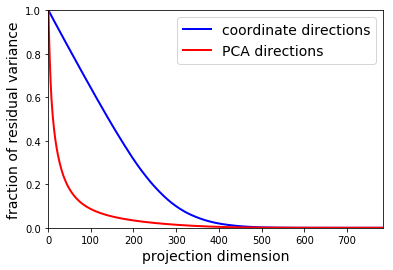

In [15]:
# Compute fraction of overall variance lost when projecting to k coordinate directions
total_coordinate_variance = np.cumsum(coordinate_variances)
total_coordinate_variance = total_coordinate_variance/total_coordinate_variance[783] #normalized cumulative variance
# Compute fraction of overall variance lost when projecting to k eigenvector directions
total_eigenvector_variance = np.cumsum(eigenvector_variances)
total_eigenvector_variance = total_eigenvector_variance/total_eigenvector_variance[783]
# Plot these results
plt.plot(np.arangmputing the eigenvalues and eigenvectors of the covariance matrix. The routine(1,784), total_coordinate_variance[784:0:-1], 'b-', lw=2)
plt.plot(np.arange(1,784), total_eigenvector_variance[784:0:-1], 'r-', lw=2)
plt.xlabel('projection dimension', fontsize=14)
plt.ylabel('fraction of residual variance', fontsize=14)
plt.xlim(0,784)
plt.ylim(0.0,1.0)
plt.legend(['coordinate directions', 'PCA directions'], fontsize=14)
plt.show()

In [16]:
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)

In [17]:
# Compute a matrix that projects a point from the 734-th dimensional space into the eigenvectors directions and then give 
# the point in the original's space coordinates
def projection_and_reconstruction(k):
    U = eigenvectors[:,(784-k):784]
    P = np.dot(U,U.T)
    return P

In [18]:
def show_digit(x):
    # Make sure all entries of x are in the range [0,255]
    for i in range(784):
        x[i] = max(0.0, x[i])
        x[i] = min(255.0, x[i])
    # Now display
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

In [22]:
def show_effect_of_PCA(x, k_list):
    print ("Original:")
    show_digit(x)
    for k in k_list:
        if (k > 0) and (k < 784):
            print("Projection to dimension ", k)
            P = projection_and_reconstruction(k)
            show_digit(P.dot(x))

Original:


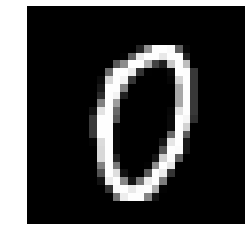

Projection to dimension  100


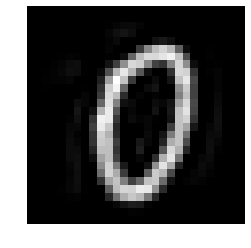

Projection to dimension  50


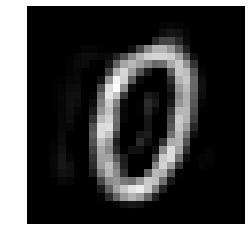

Projection to dimension  25


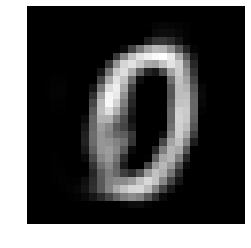

Projection to dimension  10


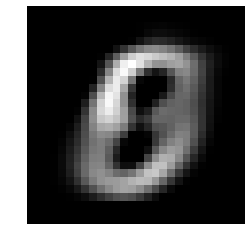

In [23]:
index = 1000 #datapoint to test
show_effect_of_PCA(train_data[index,], [100, 50, 25, 10])